In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv file

df=pd.read_csv("C:/Users/R/Desktop/6th sem/projects/Sales Status Analysis/Dataset.csv",sep=',', index_col=False,
               low_memory=False, dtype='unicode')
df

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,...,INR,406,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,FALSE,Easy Ship,NaN
1,404-0687676-7273146,4/30/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,...,INR,329,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,TRUE,NaN,NaN
2,407-1069790-7240320,4/30/2022,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,...,INR,574,CHENNAI,TAMIL NADU,600073,IN,NaN,FALSE,NaN,NaN
3,404-1490984-4578765,4/30/2022,Shipped,Amazon,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,...,INR,824,GHAZIABAD,UTTAR PRADESH,201102,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,FALSE,NaN,NaN
4,408-5748499-6859555,4/30/2022,Shipped,Amazon,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,...,INR,653,CHANDIGARH,CHANDIGARH,160036,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,FALSE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113509,406-6001380-7673107,5/31/2022,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,...,INR,517,HYDERABAD,TELANGANA,500013,IN,NaN,FALSE,NaN,FALSE
113510,402-9551604-7544318,5/31/2022,Shipped,Amazon,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,...,INR,999,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,FALSE,NaN,FALSE
113511,407-9547469-3152358,5/31/2022,Shipped,Amazon,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,...,INR,690,HYDERABAD,TELANGANA,500049,IN,NaN,FALSE,NaN,FALSE
113512,402-6184140-0545956,5/31/2022,Shipped,Amazon,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,...,INR,1199,Halol,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,FALSE,NaN,FALSE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113514 entries, 0 to 113513
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Order ID            113514 non-null  object
 1   Date                113514 non-null  object
 2   Status              113514 non-null  object
 3   Fulfilment          113514 non-null  object
 4   ship-service-level  113514 non-null  object
 5   Style               113514 non-null  object
 6   SKU                 113514 non-null  object
 7   Category            113514 non-null  object
 8   Size                113514 non-null  object
 9   ASIN                113514 non-null  object
 10  Courier Status      113514 non-null  object
 11  Qty                 113514 non-null  object
 12  currency            113514 non-null  object
 13  Amount              113514 non-null  object
 14  ship-city           113514 non-null  object
 15  ship-state          113514 non-null  object
 16  sh

In [5]:
df.nunique()

Order ID              105781
Date                      90
Status                    12
Fulfilment                 2
ship-service-level         2
Style                   1370
SKU                     7112
Category                   9
Size                      11
ASIN                    7108
Courier Status             2
Qty                        6
currency                   1
Amount                   865
ship-city               8487
ship-state                67
ship-postal-code        9139
ship-country               1
promotion-ids           5722
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [6]:
df.apply(pd.unique)

Order ID              [171-9198151-1101146, 404-0687676-7273146, 407...
Date                  [4/30/2022, 4/29/2022, 4/28/2022, 4/27/2022, 4...
Status                [Shipped - Delivered to Buyer, Shipped, Cancel...
Fulfilment                                           [Merchant, Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [JNE3781, JNE3371, JNE3671, SET264, J0095, JNE...
SKU                   [JNE3781-KR-XXXL, JNE3371-KR-XL, JNE3671-TU-XX...
Category              [kurta, Top, Set, Western Dress, Ethnic Dress,...
Size                   [3XL, XL, L, S, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09K3WFS32, B07WV4JV4D, B098714BZP, B08YN7XDS...
Courier Status                                     [Shipped, Unshipped]
Qty                                                  [1, 2, 3, 5, 4, 8]
currency                                                          [INR]
Amount                [406, 329, 574, 824, 653, 399, 363, 685, 3

In [7]:
df.isnull()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
113510,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
113511,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
113512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [8]:
# Dropping unwanted columns

df.drop(columns = ['Order ID','Unnamed: 22','fulfilled-by','ship-country', 'currency',
                   'promotion-ids', 'SKU', 'ASIN', 'B2B' ], inplace=True)

In [9]:
#Checking the unique names of the state
df['ship-state'].unique()

array(['KARNATAKA', 'MAHARASHTRA', 'TAMIL NADU', 'UTTAR PRADESH',
       'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH', 'RAJASTHAN', 'DELHI',
       'HARYANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ODISHA',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'NAGALAND', 'Gujarat',
       'UTTARAKHAND', 'BIHAR', 'JAMMU & KASHMIR', 'PUNJAB',
       'HIMACHAL PRADESH', 'ARUNACHAL PRADESH', 'MANIPUR', 'Goa',
       'MEGHALAYA', 'PUDUCHERRY', 'GOA', 'TRIPURA', 'LADAKH',
       'DADRA AND NAGAR', 'SIKKIM', 'Delhi', 'ANDAMAN & NICOBAR ',
       'Punjab', 'Rajshthan', 'Manipur', 'rajasthan', 'Odisha', 'NL',
       'Bihar', 'MIZORAM', 'punjab', 'New Delhi', 'Rajasthan',
       'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan'], dtype=object)

In [10]:
#Standardizing the data
df.loc[df['ship-state'].isin(['GOA','goa','Goa']),'ship-state'] = 'GOA'
df.loc[df['ship-state'].isin(['rajsthan','Rajasthan','rajasthan','Rajshthan','Rajsthan','RAJASTHAN', 'RJ']),'ship-state'] = 'RAJASTHAN'
df.loc[df['ship-state'].isin(['Punjab/Mohali/Zirakpur','PB','punjab','PUNJAB']),'ship-state'] = 'PUNJAB'
df.loc[df['ship-state'].isin([ 'AR','Arunachal pradesh','ARUNACHAL PRADESH']),'ship-state'] = 'ARUNACHALA PRADESH'
df.loc[df['ship-state'].isin(['NL','NAGALAND']),'ship-state'] = 'NAGALAND'
df.loc[df['ship-state'].isin(['Puducherry']),'ship-state'] = 'PONDICHEERY'
df.loc[df['ship-state'].isin(['orissa','Odisha','ODISHA']),'ship-state'] = 'ORISSA'
df.loc[df['ship-state'].isin(['SIKKIM']),'ship-state'] = 'SIKKIM'
df.loc[df['ship-state'].isin(['bihar']),'ship-state'] = 'BIHAR'
df.loc[df['ship-state'].isin(['CHANDIGARH']),'ship-state'] = 'CHANDIGARH'
df.loc[df['ship-state'].isin(['delhi','New Delhi','DELHI']),'ship-state'] = 'DELHI'

In [11]:
# Renaming columns

mapper = {'Status':'Ship_Status','ship-service-level':'Service_Ship_Level',  
         'Courier Status':'Courier_Ship_Status', 'Qty':'Order_Quantity', 
          'ship-city':'City','ship-state':'State'}
df.rename(columns=mapper, inplace =True)

In [12]:
total_record=len(df)
total_record

113514

In [13]:
df.duplicated().sum()

461

In [14]:
df.drop_duplicates(inplace = True)
after_removed_duplicates = len(df)
duplicate_rows_removed = total_record - after_removed_duplicates
print(f'{duplicate_rows_removed} duplicate rows have been removed! \nThe Dataset now has {after_removed_duplicates} rows.')

461 duplicate rows have been removed! 
The Dataset now has 113053 rows.


In [15]:
# Sum of null values 

df.isnull().sum()

Date                   0
Ship_Status            0
Fulfilment             0
Service_Ship_Level     0
Style                  0
Category               0
Size                   0
Courier_Ship_Status    0
Order_Quantity         0
Amount                 0
City                   0
State                  0
ship-postal-code       0
dtype: int64

<AxesSubplot: >

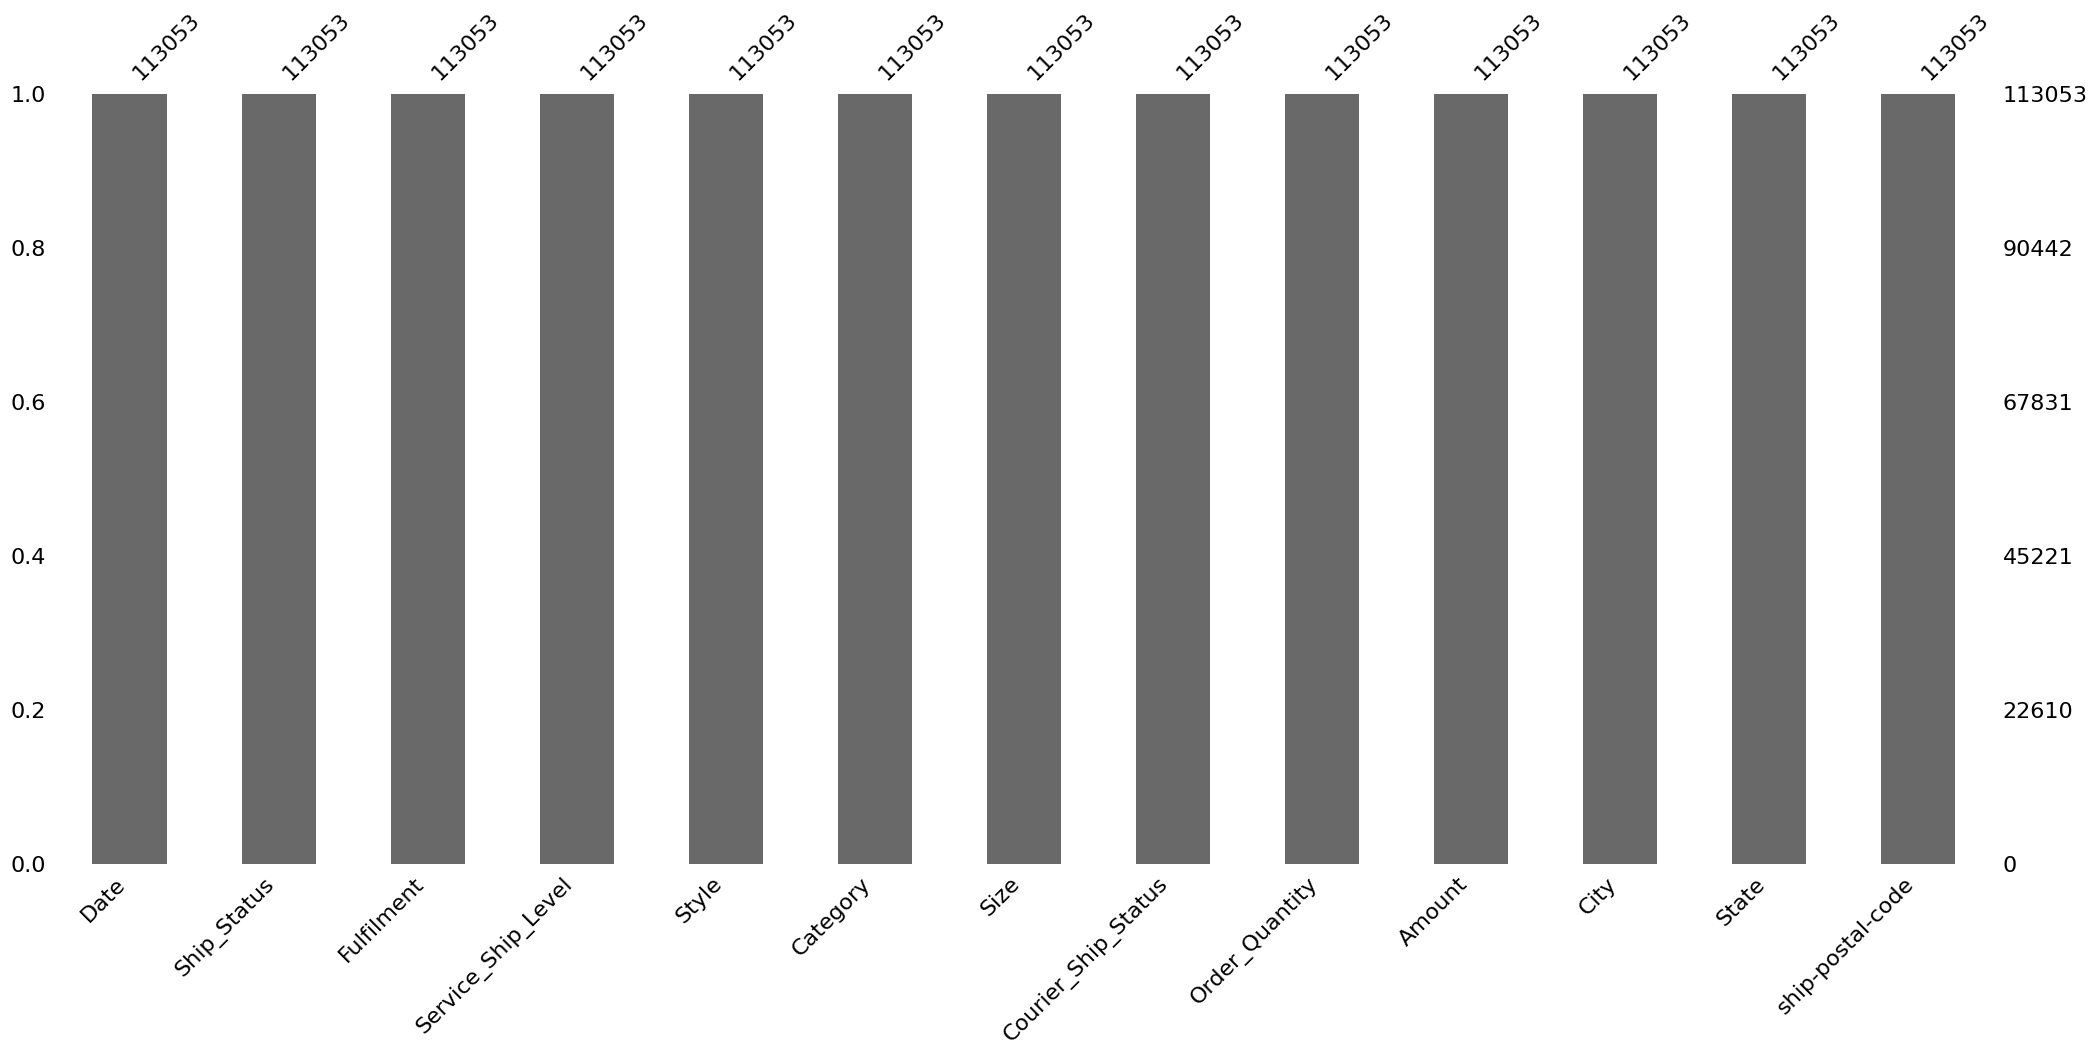

In [16]:
msno.bar(df)

In [17]:
# Changing date formate

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Ship_Status,Fulfilment,Service_Ship_Level,Style,Category,Size,Courier_Ship_Status,Order_Quantity,Amount,City,State,ship-postal-code
0,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,kurta,3XL,Shipped,1,406,BENGALURU,KARNATAKA,560085
1,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,Shipped,1,329,NAVI MUMBAI,MAHARASHTRA,410210
2,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,Shipped,1,574,CHENNAI,TAMIL NADU,600073
3,2022-04-30,Shipped,Amazon,Expedited,SET264,Set,XL,Shipped,1,824,GHAZIABAD,UTTAR PRADESH,201102
4,2022-04-30,Shipped,Amazon,Expedited,J0095,Set,L,Shipped,1,653,CHANDIGARH,CHANDIGARH,160036


In [18]:
# unique months 

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Date,Ship_Status,Fulfilment,Service_Ship_Level,Style,Category,Size,Courier_Ship_Status,Order_Quantity,Amount,City,State,ship-postal-code,Month,Day
0,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,kurta,3XL,Shipped,1,406,BENGALURU,KARNATAKA,560085,4,30
1,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,Shipped,1,329,NAVI MUMBAI,MAHARASHTRA,410210,4,30
2,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,Shipped,1,574,CHENNAI,TAMIL NADU,600073,4,30
3,2022-04-30,Shipped,Amazon,Expedited,SET264,Set,XL,Shipped,1,824,GHAZIABAD,UTTAR PRADESH,201102,4,30
4,2022-04-30,Shipped,Amazon,Expedited,J0095,Set,L,Shipped,1,653,CHANDIGARH,CHANDIGARH,160036,4,30


In [19]:
df.dtypes

Date                   datetime64[ns]
Ship_Status                    object
Fulfilment                     object
Service_Ship_Level             object
Style                          object
Category                       object
Size                           object
Courier_Ship_Status            object
Order_Quantity                 object
Amount                         object
City                           object
State                          object
ship-postal-code               object
Month                           int64
Day                             int64
dtype: object

In [20]:
df['Month'].unique()

array([4, 5, 6], dtype=int64)

In [21]:
print(df['Month'].value_counts())

4    42918
5    36919
6    33216
Name: Month, dtype: int64


In [22]:
df.shape

(113053, 15)

In [23]:
# Changing datatypes

df = df.astype({"Amount": 'int64', "Order_Quantity": 'int64'})
df.dtypes

Date                   datetime64[ns]
Ship_Status                    object
Fulfilment                     object
Service_Ship_Level             object
Style                          object
Category                       object
Size                           object
Courier_Ship_Status            object
Order_Quantity                  int64
Amount                          int64
City                           object
State                          object
ship-postal-code               object
Month                           int64
Day                             int64
dtype: object

In [24]:
df['Sales_Revenue']=df['Amount']*df['Order_Quantity']
df

,Date,Ship_Status,Fulfilment,Service_Ship_Level,Style,Category,Size,Courier_Ship_Status,Order_Quantity,Amount,City,State,ship-postal-code,Month,Day,Sales_Revenue
0,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,kurta,3XL,Shipped,1,406,BENGALURU,KARNATAKA,560085,4,30,406
1,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,Shipped,1,329,NAVI MUMBAI,MAHARASHTRA,410210,4,30,329
2,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,Shipped,1,574,CHENNAI,TAMIL NADU,600073,4,30,574
3,2022-04-30,Shipped,Amazon,Expedited,SET264,Set,XL,Shipped,1,824,GHAZIABAD,UTTAR PRADESH,201102,4,30,824
4,2022-04-30,Shipped,Amazon,Expedited,J0095,Set,L,Shipped,1,653,CHANDIGARH,CHANDIGARH,160036,4,30,653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113509,2022-05-31,Shipped,Amazon,Expedited,JNE3697,kurta,XL,Shipped,1,517,HYDERABAD,TELANGANA,500013,5,31,517
113510,2022-05-31,Shipped,Amazon,Expedited,SET401,Set,M,Shipped,1,999,GURUGRAM,HARYANA,122004,5,31,999
113511,2022-05-31,Shipped,Amazon,Expedited,J0157,Western Dress,XXL,Shipped,1,690,HYDERABAD,TELANGANA,500049,5,31,690
113512,2022-05-31,Shipped,Amazon,Expedited,J0012,Set,XS,Shipped,1,1199,Halol,Gujarat,389350,5,31,1199


In [25]:
#df.to_csv("Amazon1.csv")

In [26]:
# make a copy

ds=df.copy(deep="True")
ds.head()

,Date,Ship_Status,Fulfilment,Service_Ship_Level,Style,Category,Size,Courier_Ship_Status,Order_Quantity,Amount,City,State,ship-postal-code,Month,Day,Sales_Revenue
0,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,kurta,3XL,Shipped,1,406,BENGALURU,KARNATAKA,560085,4,30,406
1,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,Shipped,1,329,NAVI MUMBAI,MAHARASHTRA,410210,4,30,329
2,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,Shipped,1,574,CHENNAI,TAMIL NADU,600073,4,30,574
3,2022-04-30,Shipped,Amazon,Expedited,SET264,Set,XL,Shipped,1,824,GHAZIABAD,UTTAR PRADESH,201102,4,30,824
4,2022-04-30,Shipped,Amazon,Expedited,J0095,Set,L,Shipped,1,653,CHANDIGARH,CHANDIGARH,160036,4,30,653


In [27]:
ds.dtypes

Date                   datetime64[ns]
Ship_Status                    object
Fulfilment                     object
Service_Ship_Level             object
Style                          object
Category                       object
Size                           object
Courier_Ship_Status            object
Order_Quantity                  int64
Amount                          int64
City                           object
State                          object
ship-postal-code               object
Month                           int64
Day                             int64
Sales_Revenue                   int64
dtype: object

In [28]:
ds.describe() 

,Order_Quantity,Amount,Month,Day,Sales_Revenue
count,113053.000000,113053.000000,113053.000000,113053.000000,113053.000000
mean,1.003857,663.160863,4.914182,14.890122,668.730923
std,0.073475,269.576153,0.816136,8.750536,342.013967
min,1.000000,199.000000,4.000000,1.000000,199.000000
25%,1.000000,459.000000,4.000000,7.000000,459.000000
50%,1.000000,625.000000,5.000000,15.000000,625.000000
75%,1.000000,788.000000,6.000000,22.000000,788.000000
max,8.000000,5584.000000,6.000000,31.000000,44672.000000


In [29]:
ds.corr()

C:\Users\R\AppData\Local\Temp\ipykernel_22400\2971842641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()


,Order_Quantity,Amount,Month,Day,Sales_Revenue
Order_Quantity,1.000000,0.152094,-0.001561,-0.007816,0.528719
Amount,0.152094,1.000000,0.059272,0.016161,0.865908
Month,-0.001561,0.059272,1.000000,-0.072271,0.045098
Day,-0.007816,0.016161,-0.072271,1.000000,0.009861
Sales_Revenue,0.528719,0.865908,0.045098,0.009861,1.000000


C:\Users\R\AppData\Local\Temp\ipykernel_22400\2027686208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(), annot=True, cmap="Purples", linewidths=0.006, linecolor="Black")


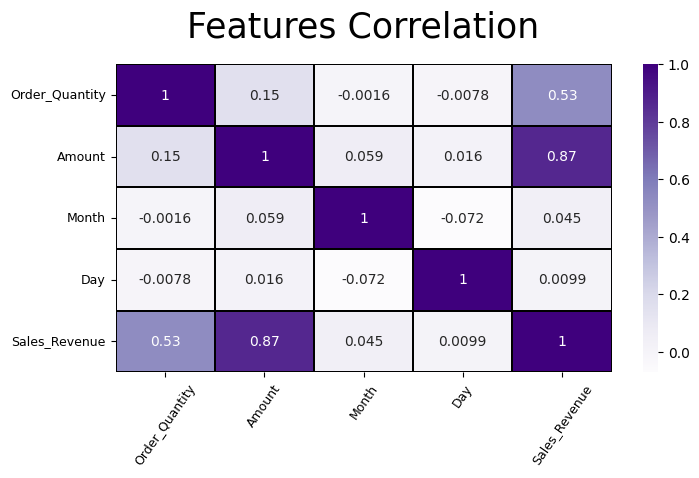

In [30]:
plt.figure(figsize=(8,4))
sns.heatmap(ds.corr(), annot=True, cmap="Purples", linewidths=0.006, linecolor="Black")
plt.title("Features Correlation",fontsize=25, pad=20)
plt.xticks(fontsize=9, rotation=55)
plt.yticks(fontsize=9);

In [31]:
df.corr()['Sales_Revenue'].sort_values(ascending=False)

C:\Users\R\AppData\Local\Temp\ipykernel_22400\3038106136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Sales_Revenue'].sort_values(ascending=False)


Sales_Revenue     1.000000
Amount            0.865908
Order_Quantity    0.528719
Month             0.045098
Day               0.009861
Name: Sales_Revenue, dtype: float64

Set              43805
kurta            43636
Western Dress    13606
Top               9645
Ethnic Dress      1017
Blouse             813
Bottom             381
Saree              147
Dupatta              3
Name: Category, dtype: int64


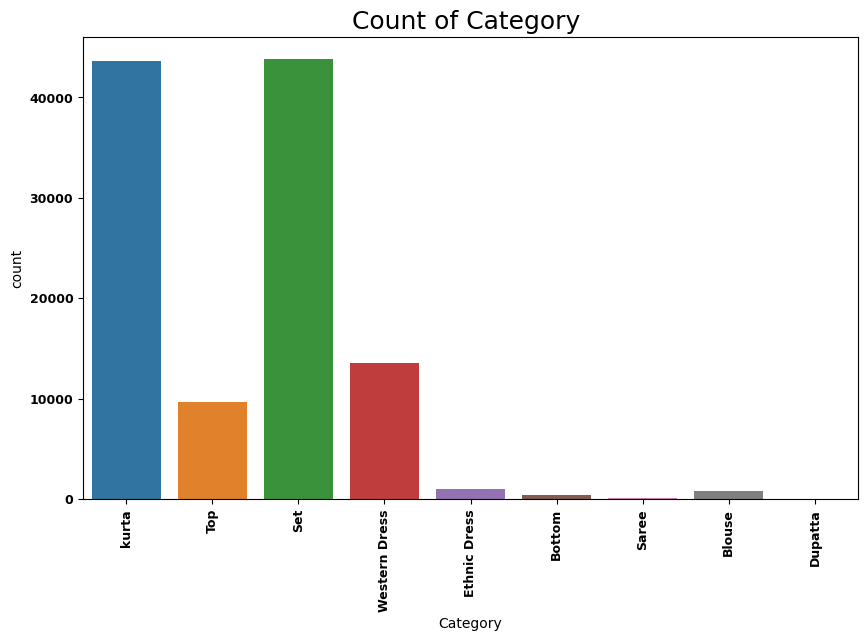

In [32]:
print(df['Category'].value_counts())
plt.figure(figsize = (10,6))
plt.title("Count of Category ",color="black",size=18)
plt.xticks(fontsize=9,rotation =90,weight = 'bold')
plt.yticks(fontsize=9,weight = 'bold')
ax = sns.countplot(data = df, x = 'Category', palette="tab10" )
plt.show()

Amazon      81519
Merchant    31534
Name: Fulfilment, dtype: int64
Shipped      106859
Unshipped      6194
Name: Courier_Ship_Status, dtype: int64


<AxesSubplot: xlabel='Courier_Ship_Status', ylabel='count'>

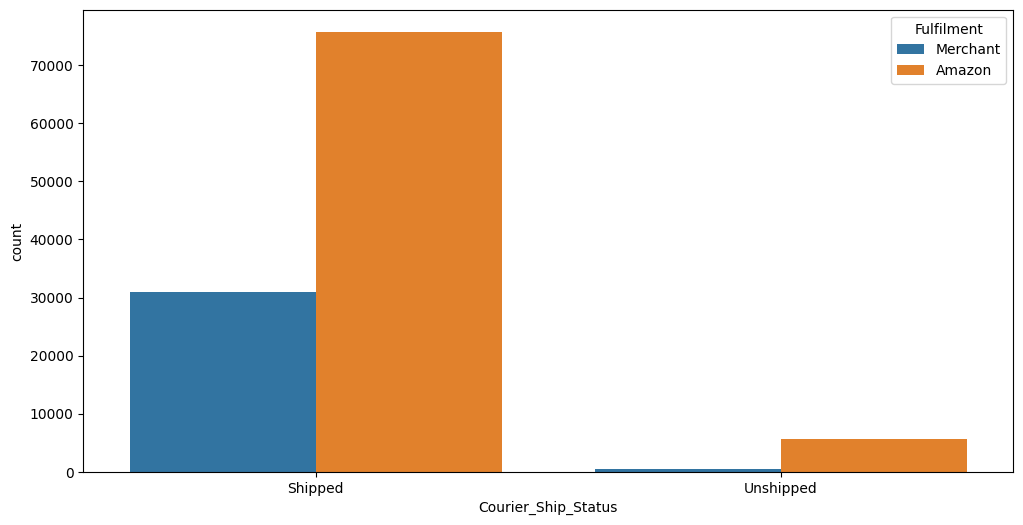

In [33]:
print(df['Fulfilment'].value_counts())
print(df['Courier_Ship_Status'].value_counts())
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Courier_Ship_Status', hue = 'Fulfilment', data = df)

In [34]:
# Importing library for labelencode

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [35]:
# LableEncoder based on lable

ds['Category'].unique()

array(['kurta', 'Top', 'Set', 'Western Dress', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [36]:
ds['Category']=le.fit_transform(ds['Category'])
ds['Category'].unique()

array([8, 6, 5, 7, 3, 1, 4, 0, 2])

In [37]:
ds['Ship_Status'].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Out for Delivery', 'Shipped - Returning to Seller',
       'Shipped - Picked Up', 'Pending', 'Shipped - Lost in Transit',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

In [38]:
ds['Ship_Status']=le.fit_transform(ds['Ship_Status'])
ds['Ship_Status'].unique()

array([ 5,  3,  0, 10,  9,  7, 11,  8,  1,  6,  2,  4])

In [39]:
ds['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [40]:
ds['Fulfilment']=le.fit_transform(ds['Fulfilment'])
ds['Fulfilment'].unique()

array([1, 0])

In [41]:
ds['Service_Ship_Level'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [42]:
ds['Service_Ship_Level']=le.fit_transform(ds['Service_Ship_Level'])
ds['Service_Ship_Level'].unique()

array([1, 0])

In [43]:
ds['Courier_Ship_Status'].unique()

array(['Shipped', 'Unshipped'], dtype=object)

In [44]:
ds['Courier_Ship_Status']=le.fit_transform(ds['Courier_Ship_Status'])
ds['Courier_Ship_Status'].unique()

array([0, 1])

In [45]:
ds['Order_Quantity'].unique()

array([1, 2, 3, 5, 4, 8], dtype=int64)

In [46]:
ds.head()

,Date,Ship_Status,Fulfilment,Service_Ship_Level,Style,Category,Size,Courier_Ship_Status,Order_Quantity,Amount,City,State,ship-postal-code,Month,Day,Sales_Revenue
0,2022-04-30,5,1,1,JNE3781,8,3XL,0,1,406,BENGALURU,KARNATAKA,560085,4,30,406
1,2022-04-30,3,0,0,JNE3371,8,XL,0,1,329,NAVI MUMBAI,MAHARASHTRA,410210,4,30,329
2,2022-04-30,3,0,0,JNE3671,6,3XL,0,1,574,CHENNAI,TAMIL NADU,600073,4,30,574
3,2022-04-30,3,0,0,SET264,5,XL,0,1,824,GHAZIABAD,UTTAR PRADESH,201102,4,30,824
4,2022-04-30,3,0,0,J0095,5,L,0,1,653,CHANDIGARH,CHANDIGARH,160036,4,30,653


In [47]:
# Importing librarys for classification algorithms 

from sklearn.tree import DecisionTreeClassifier as dsc
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [48]:
# x input

feature_cols=['Category','Order_Quantity','Courier_Ship_Status','Fulfilment','Service_Ship_Level']
x=ds[feature_cols]
x.head()

# y output

y=ds['Ship_Status']
y.head()

0    5
1    3
2    3
3    3
4    3
Name: Ship_Status, dtype: int32

In [49]:
# Splitting train and test

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90442, 5)
(90442,)
(22611, 5)
(22611,)


In [50]:
classifier=dsc(max_leaf_nodes=80, random_state=43)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=80, random_state=43)

In [51]:
y_predict=classifier.predict(x_test)
print(y_predict)

[5 3 3 ... 3 3 3]


In [52]:
dfr=pd.DataFrame({'Actual':y_test, 'Predicted ':y_predict})
dfr=dfr.set_index("Actual")
dfr

,Predicted
Actual,
5,5
3,3
3,3
5,5
3,3
...,...
3,3
3,3
3,3


In [53]:
print("Accuracy:", metrics.accuracy_score(y_test,y_predict)*100)

Accuracy: 96.8068639157932


In [54]:
# Importing lib for randomforest

from sklearn.ensemble import RandomForestClassifier as rfc

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=43)

In [56]:
rfc=rfc(n_estimators=100)

In [57]:
rfc=rfc.fit(x_train, y_train)

In [58]:
y_predicted=rfc.predict(x_test)
print(y_predicted)

[5 3 3 ... 3 3 3]


In [59]:
print("Accuracy:", metrics.accuracy_score(y_test,y_predicted)*100)

Accuracy: 96.79801866348238


In [60]:
# Importing library Support Vector Machine

from sklearn.svm import SVC

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [62]:
clf=SVC( kernel = 'linear', C=1, random_state=1)

In [63]:
clf.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [64]:
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 96.82897704657026
